**1. Считайте wav-файл.<br>Выведите частоту дискретизации.<br>Отобразите две секунды данных на графике.**<br>

11025


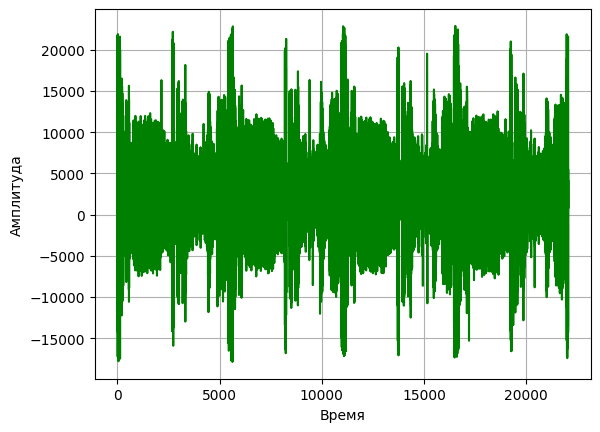

In [1]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
input_data = read("lw2.wav")
fr = input_data[0]
print(fr)
audio = input_data[1]
# print(audio[:100])
audio = np.array(audio) 
audio2 = audio
audio2 = audio - np.ones(len(audio))*audio.mean()
plt.plot(audio2[:fr*2], color = "green")
plt.ylabel("Амплитуда")
plt.xlabel("Время")
plt.grid()
plt.show()

**2. Осуществите преобразование Гильберта.<br>Постройте огибающую амплитуды аналитического сигнала.<br>Добавьте на график из п. 1 получившуюся огибающую амплитуды.**

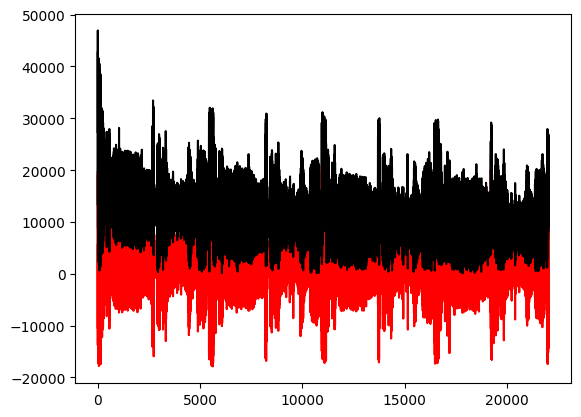

In [2]:
import scipy.signal as sg

# audio2 = 

hilp = np.abs(sg.hilbert(audio2))

plt.plot(audio2[0:fr*2], color = "red")
plt.plot(hilp[0:fr*2], color = "black")


**3. Постройте и отобразите изображение из полученных данных.**

954


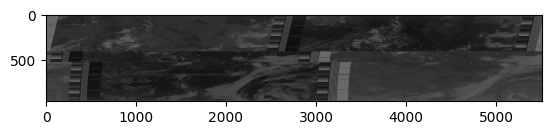

954

In [3]:
ln_elem = 5512

hilp = np.array(hilp)
samp = hilp[:len(hilp)//5512*5512].reshape(len(hilp)//5512,5512)
print(len(samp))
fig, ax = plt.subplots()
ax.imshow(samp, cmap="gray")
plt.show()
max(samp[0])
len(samp)

**4. Измените частоту дискретизации в соответствии с форматом APT (можно выполнить на предыдущих шагах).<br>Выровняйте изображение по синхроимпульсу.**

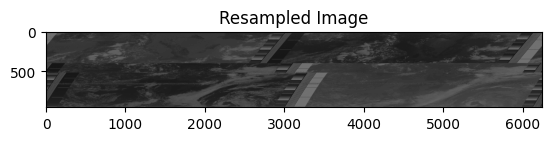

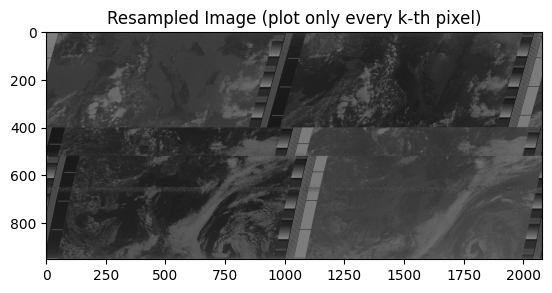

/tmp/ipykernel_3700/3309877644.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  img = np.array(img, dtype=float)


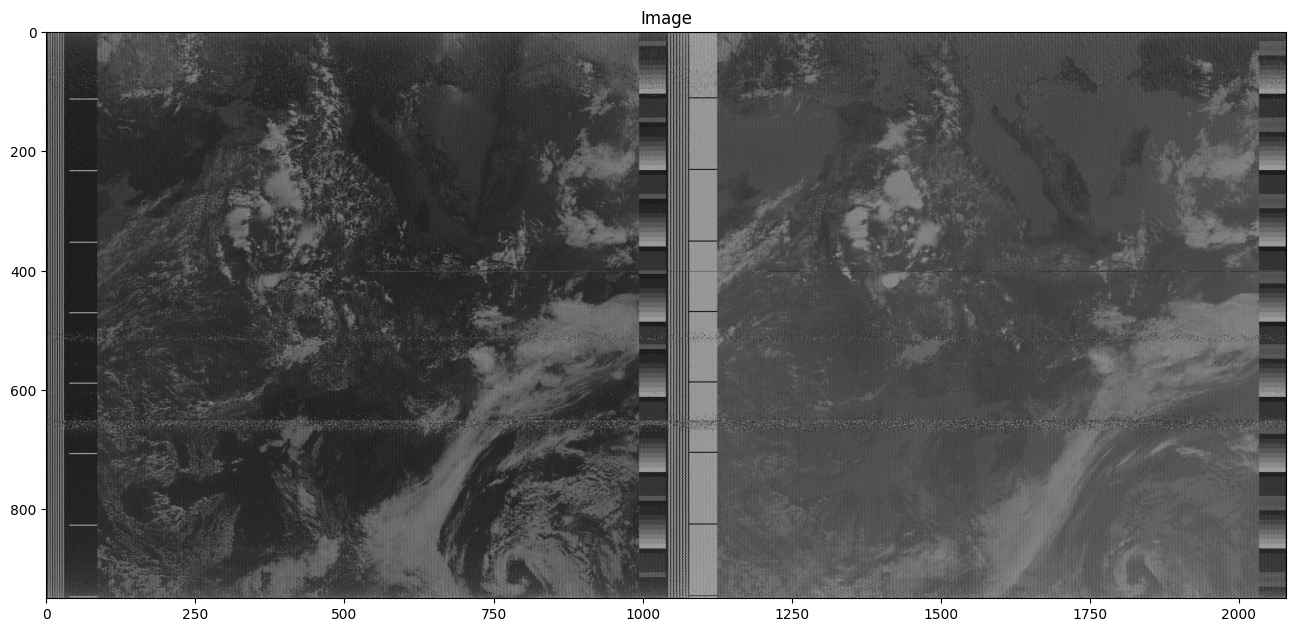

In [4]:
from scipy.signal import resample

rate = 2080 * 2
k = 3
sample_rate = fr

data = hilp

resampled = resample(data, int(data.shape[0] * rate * k / sample_rate))
normalized = np.array((resampled - min(resampled)) / ((max(resampled) - min(resampled)) / 2))
resampled = normalized
# samp = resampled[:len(resampled)//5512*5512].reshape(len(resampled)//5512,5512)
strings_1, strings_2 = [], []
for i in range(0, len(resampled), int(rate * k / 2)):
    string_1 = resampled[i:i + int(rate * k / 2)]
    strings_1.append(string_1)
    string_2 = resampled[i:i + int(rate * k / 2):k]
    strings_2.append(string_2)
plt.figure()
plt.imshow(strings_1[:-1], cmap='gray')
plt.title('Resampled Image')
plt.show()

plt.figure()
plt.imshow(strings_2[:-1], cmap='gray')
plt.title('Resampled Image (plot only every k-th pixel)')
plt.show()

# dataStr = ""

# resampled = normalized
# print(normalized[:100])

# resampled = np.array(strings_2[:-1], dtype=complex)
resampled = np.array(strings_2[:-1], dtype=complex)
resampled = resampled.flatten()
sync = np.array([0] * 4 + [1, 1, 0, 0] * 7 + [0] * 7, dtype=float)
range_between = 2000
peaks = [(0, 0)]
shifted_signal = resampled - 0.5
sync -= 0.5
img = []
for i in range(len(resampled) - len(sync)):
    edge = np.dot(sync, shifted_signal[i:i + len(sync)])
    if i - peaks[-1][0] >= range_between:
        peaks.append((i, edge))
    elif edge > peaks[-1][1]:
        peaks[-1] = (i, edge)

for i in range(len(peaks) - 1):
    img.append(resampled[peaks[i][0]:peaks[i][0] + 2080])

img = np.array(img, dtype=float)

plt.figure(figsize=(16,9))
plt.imshow(img, cmap='gray')
# print(img[:100])
plt.title('Image')
plt.show()

**5. Сделайте самый темный пиксель черным, а самый светлый - белым.**

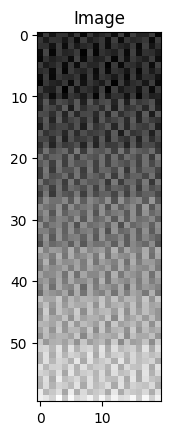

1.002691906774519 0.08929483727899518
254.9977795013254 0.0002554522699464825


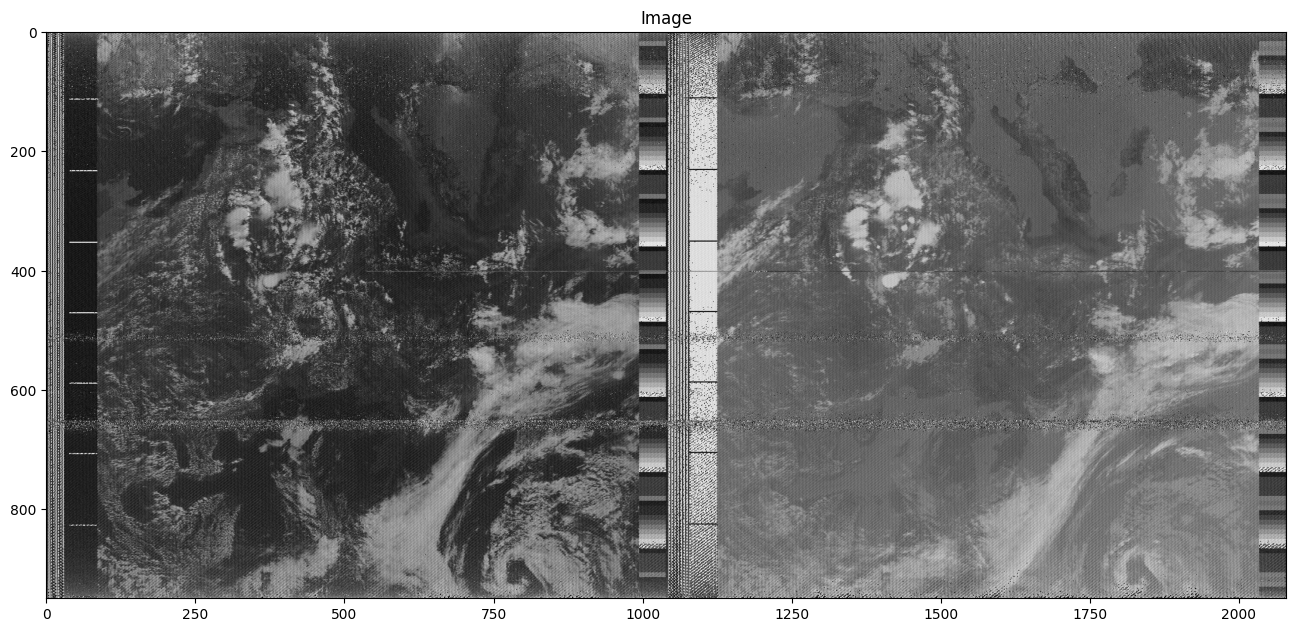

In [5]:
strip = img[420:480]
img2 = []
mx = 0
mn = 100000000
for i in range(len(strip)):
    img2.append(strip[i][1000:1020])
    mx = max(max(img2[-1]), mx)
    mn = min(min(img2[-1]), mn)
plt.figure()
plt.imshow(img2, cmap="gray")
plt.title("Image")
plt.show()

for i in range(len(img)):
    for j in range(2080):
        if (img[i][j] >= mx):
            img[i][j] = mx
        elif img[i][j] <= mn:
            img[i][j] = mn
        else:
            A = (img[i][j] - mn)/(mx-img[i][j])
            img[i][j] = 255*A/(A+1)
print(mx, mn)

for i in range(len(img)):
    # img2.append(strip[i][1000:1020])
    mx = max(max(img[i]), mx)
    mn = min(min(img[i]), mn)
print(mx, mn)
plt.figure(figsize=(16,9))
plt.imshow(img, cmap="gray")
# plt.savefig("test.png")
plt.title("Image")
plt.show()


**6. Выделите блоки телеметрии.<br>Выведите получившиеся яркостные температуры платиновых терморезисторов $C_{N}$,
$N \in [1, 4]$, АЧТ $C_{BB}$ и реликтового излучения $C_S$.<br>
Изображение должно быть нормализованным и иметь значения интенсивностей в диапазоне 0-255.**

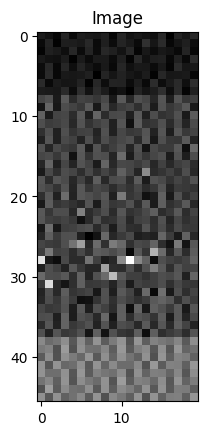

[23.2788033216329, 59.866144829325144, 61.04853191571618, 70.62073844207534, 61.782620291856944, 115.26036423964725]


In [6]:
# Ваш код
strip = img[487:533]
img2 = []
mx = 0
mn = 100000000
for i in range(len(strip)):
    img2.append(strip[i][1000:1020])
    mx = max(max(img2[-1]), mx)
    mn = min(min(img2[-1]), mn)
plt.figure()
plt.imshow(img2, cmap="gray")
plt.title("Image")
plt.show()

# ln = (533 - 487)/6
# print(ln)
t1 = np.array(img2[:8]).mean()
t2 = np.array(img2[9:16]).mean()
t3 = np.array(img2[17:24]).mean()
t4 = np.array(img2[25:32]).mean()
t5 = np.array(img2[33:38]).mean()
t6 = np.array(img2[39:]).mean()
temps = [t1, t2, t3, t4, t5, t6]
print(temps) #температуры резисторов t2, t3, t4, t5 реликтово t1 ачт t6

**7. Вычислите термодинамическую температуру терморезисторов по формуле: $T_N = d_0 + d_1 C_N + d_2 C_N^2$.**

|N|$d_0$|$d_1$|$d_2$|
|:-:|:-:|:-:|:-:|
|1|276.6067|0.051111|1.405783E-6|
|2|276.6119|0.051090|1.496037E-6|
|3|276.6311|0.051033|1.496990E-6|
|4|276.6268|0.051058|1.493110E-6|

**Температура АЧТ $T_{BB}$ - среднее арифметическое значение этих температур.**

**Эффективную температуру, учитывающую размеры АЧТ, вычисите согласно выражению: $T_{BB}^{*} = A + B T_{BB}$.**<br>
**Коэффициенты преобразования $A$ и $B$ указываются производителем спутника: $A = 1.67396$, $B = 0.997364$.**

In [7]:
# Ваш код
T2 = 276.6067 + 0.051111 * t2 + 1.405783E-6*t2**2
T3 = 276.6119 + 0.051090 * t3 + 1.496037E-6*t3**2
T4 = 276.6311 + 0.051033 * t4 + 1.496990E-6*t4**2
T5 = 276.6268 + 0.051058 * t5 + 1.493110E-6*t5**2
tvv = (T2 + T3 + T4 + T5)/4
Tvv = 1.67396 + 0.997364*tvv
Tvv

280.79563873651824

**8. Для перевода значения излучения с поверхности Земли в градусы Кельвина, производителем спутника составляется таблица соответствия в диапазоне 180-340К. На основе этой таблицы вычисляются коэффициенты для формулы преобразования из термодинамической температуры в яркостную:**

$$N_{BB}=\frac{c_1 u_{e}^3}{\exp\left(\frac{c_2 u_c}{T_{BB}^*}\right) - 1}$$

**Вычислите $N_{BB}$, используя значения $с_1 = 1.1910E^{-5}$, $c_2 = 1.4388$, $u_e = u_c = 2670$.**

**Яркостная температура из ИК канала вычисляется согласно $N_E = N_{BB}\frac{C_S - C_E}{C_S - C_{BB}}$. <br>$C_E$ - значение яркости пикселя на изображении.**

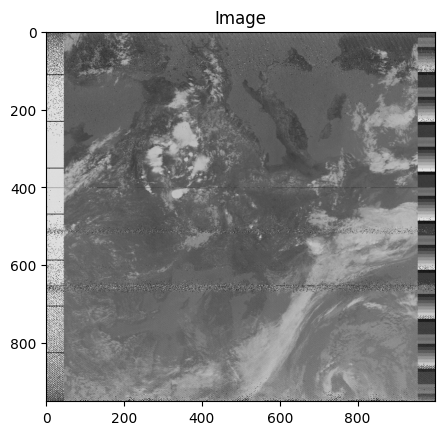

In [13]:
# Ваш код
from math import exp
Nvv = 1.1910E-5 * 2670**3 /(exp(1.4388*2670/Tvv) - 1)
# Ne = Nvv*()
temp_img = img.copy()
# img2 = []
mx = 0
mn = 100000000
# for i in range(len(temp_img)):
#     img2.append(strip[i][1150:2010])
#     mx = max(max(img2[-1]), mx)
#     mn = min(min(img2[-1]), mn)
for i in range(len(temp_img)):
    for j in range(len(temp_img[i])):
        temp_img[i][j] = Nvv * ((t2 - img[i][j])/(t2 - t6))
img2 = []
for i in temp_img:
    img2.append(i[1080:-1])
    # for j in range(len(temp_img[i])):
    #     temp_img[i][j] = 
plt.figure()
plt.imshow(img2, cmap="gray")
plt.title("Image")
plt.show()

**9. Вычислите яркостную температуру пикселя с поверхности Земли и обратным преобразованием (формула из п. 8) получите термодинамическую температуру. Далее внесите коррекцию в показатель температуры, с учетом конструкции спутника. Иными словами переведите яркостную температуру в эффективную и из эффективной температуры получите термодинамическую:**

$$T_E^* = \frac{c_2 u_c}{\ln\left[1 + \left(\frac{c_1 u_c^3}{N_E}\right)\right]}$$

$$T_E = \frac{T_E^* - A}{B}$$

**Постройте получившуюся тепловую карту, добавьте [colorbar](https://matplotlib.org/stable/gallery/color/colorbar_basics.html).**

In [ ]:
# Ваш код